Reference
 - https://swub.tistory.com/13

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt   #from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


Bad key "text.kerning_factor" on line 4 in
C:\Users\good-\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris = load_iris()
iris = pd.DataFrame(data = np.c_[iris['data'],iris['target']],
                    columns = iris['feature_names']+['species'])
iris['species'] = iris['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

  species  
0  setosa  
1  setosa  
2  setosa

In [4]:
iris.rename(columns={'sepal length (cm)' : 'sepal.length',
                     'sepal width (cm)' : 'sepal.width',
                     'petal length (cm)' : 'petal.length',
                     'petal width (cm)' : 'petal.width'}, inplace=True)
iris.head(3)

sepal.length  sepal.width  petal.length  petal.width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

In [5]:
iris[0:3]

sepal.length  sepal.width  petal.length  petal.width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

In [6]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'species'],
      dtype='object')

In [7]:
iris['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [8]:
iris.rename(columns={iris.columns[0] : 'sl',
                     iris.columns[1] : 'sw',
                     iris.columns[2] : 'pl',
                     iris.columns[3] : 'pw',
                     iris.columns[4] : 'species'},
            inplace = True)
iris.head(3)

sl   sw   pl   pw species
0  5.1  3.5  1.4  0.2  setosa
1  4.9  3.0  1.4  0.2  setosa
2  4.7  3.2  1.3  0.2  setosa

In [9]:
iris[['sl','sw']][:5]

sl   sw
0  5.1  3.5
1  4.9  3.0
2  4.7  3.2
3  4.6  3.1
4  5.0  3.6

## EDA

In [10]:
st = iris.groupby(iris.species).mean()
st

sl     sw     pl     pw
species                               
setosa      5.006  3.428  1.462  0.246
versicolor  5.936  2.770  4.260  1.326
virginica   6.588  2.974  5.552  2.026

In [11]:
st.columns.name = 'variable'
st

variable       sl     sw     pl     pw
species                               
setosa      5.006  3.428  1.462  0.246
versicolor  5.936  2.770  4.260  1.326
virginica   6.588  2.974  5.552  2.026

## Bar Plot

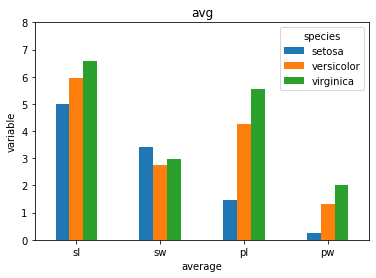

In [12]:
st.T.plot.bar(rot=0)  #rot : titlting x-axis variable name
plt.title('avg')
plt.xlabel('average')
plt.ylabel('variable')
plt.ylim(0,8)
plt.show()

## Boxplot

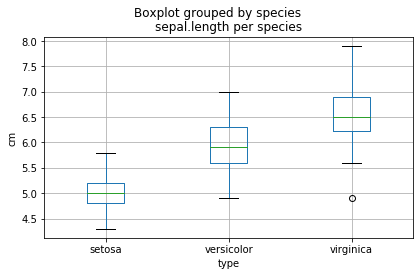

In [13]:
iris[['sl','species']].boxplot(by='species')
plt.tight_layout(pad=2, h_pad=1)
plt.title('sepal.length per species')
plt.xlabel('type')
plt.ylabel('cm')
plt.show()

## Scatter Plot

C:\Users\good-\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


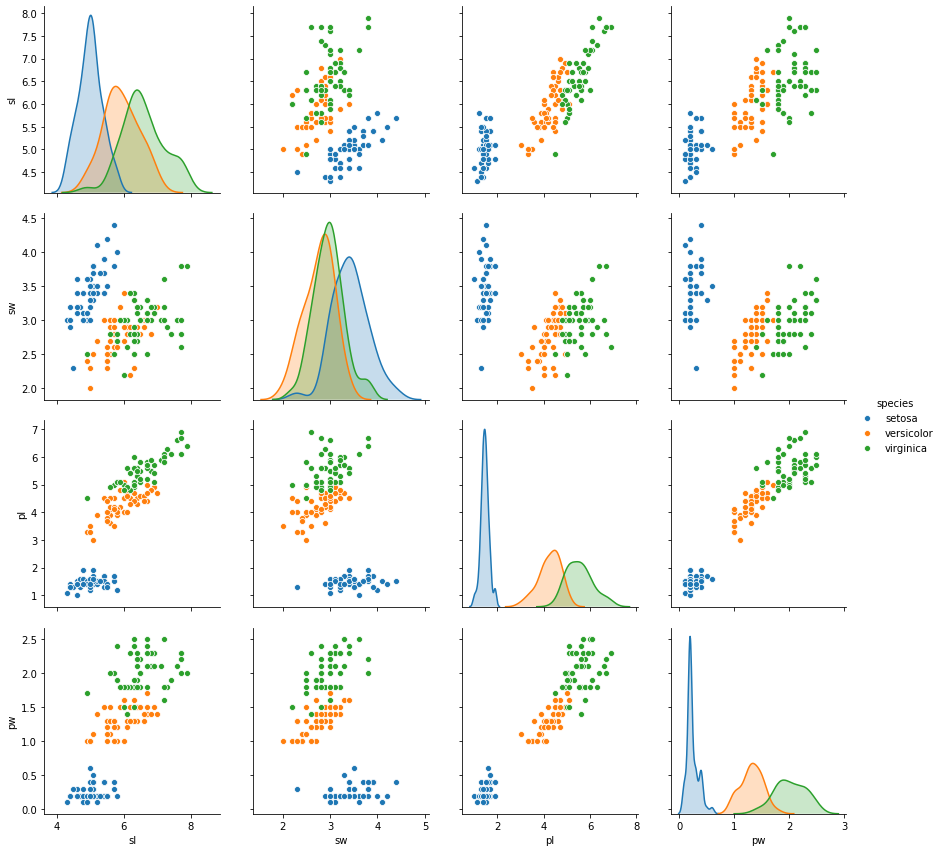

In [14]:
from copy import copy
exiris = copy(iris)
exiris["id"] = list(range(1,151))
sns.pairplot(exiris.drop('id',axis=1), hue='species', size=3)

## Logistic Regression

In [15]:
# from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = iris['species']
x = iris[['sl','sw','pl','pw']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)
print("prediction rate :", log_clf.score(x_test, y_test))

prediction rate : 0.9333333333333333


In [16]:
log_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
from sklearn import metrics
expected = y_test
predicted = log_clf.predict(x_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.77      0.87        13
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.93        45
weighted avg       0.94      0.93      0.93        45



In [18]:
print(metrics.confusion_matrix(expected, predicted))

[[17  0  0]
 [ 0 10  3]
 [ 0  0 15]]


# ROC Curve
 - Receiver Operator Characteristic

In [22]:
x_new = copy(x)  
y_new = copy(y)  
y_new.loc[y_new != 'versicolor'] = '0' 
y_new.loc[y_new == 'versicolor'] = '1'  

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3)  

log_clf = LogisticRegression()  
log_clf.fit(x_train, y_train)  
print('prediction rate: ', log_clf.score(x_test,y_test))  

prediction rate:  0.7555555555555555


In [42]:
y_train.value_counts().index

Index(['0 ', '1'], dtype='object')

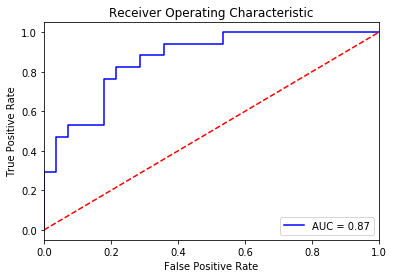

In [45]:
from sklearn import svm, datasets
from sklearn.datasets import load_breast_cancer

# probability of each value being 1
y_pred_proba = log_clf.predict_proba(x_test)[::,1] 

# ROC Curve
fpr, tpr, threshold = metrics.roc_curve(y_test.astype(int), y_pred_proba) 
roc_auc = metrics.auc(fpr, tpr) # AUC

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()